# Homework 1 , Bahadır Erdem , 21070001048


# Standard Normalization by Vectorization


For broadcasting: https://www.youtube.com/watch?v=tuKHsfAehz4
* Broadcasting enables operations to be performed element-wise on arrays of different shapes without the need for the arrays to have the same shape. 
* Broadcasting is useful when we want to perform operations between arrays of different shapes without explicitly reshaping or duplicating the data.

In [1]:
#Importing the libraries that I use in this project
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def stdnorm(X):
    return (X - np.mean(X, axis=0, keepdims=True)) / np.std(X, axis=0, keepdims=True)
N = 10
D = 3
x_org = np.arange(1, N+1).reshape(N,1) @ np.arange(1, D+1).reshape(1,D)
x_org = np.arange(1, N+1)[:, np.newaxis] * np.arange(1, D+1)   #I am not sure about this line. I will look it again later.
print(x_org.shape)
print(x_org)
x_norm = stdnorm(x_org)
print(x_norm)
print('Mean:', np.mean(x_norm, axis=0))
print('Std:', np.std(x_norm, axis=0))


(10, 3)
[[ 1  2  3]
 [ 2  4  6]
 [ 3  6  9]
 [ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]
 [ 7 14 21]
 [ 8 16 24]
 [ 9 18 27]
 [10 20 30]]
[[-1.5666989  -1.5666989  -1.5666989 ]
 [-1.21854359 -1.21854359 -1.21854359]
 [-0.87038828 -0.87038828 -0.87038828]
 [-0.52223297 -0.52223297 -0.52223297]
 [-0.17407766 -0.17407766 -0.17407766]
 [ 0.17407766  0.17407766  0.17407766]
 [ 0.52223297  0.52223297  0.52223297]
 [ 0.87038828  0.87038828  0.87038828]
 [ 1.21854359  1.21854359  1.21854359]
 [ 1.5666989   1.5666989   1.5666989 ]]
Mean: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16]
Std: [1. 1. 1.]


# The XOR Problem
Design and train a neural network with the minimum number of
neurons that predicts XOR outputs with 100% accuracy. If you use more neurons than the minimum
number you get 5 points less. You must clearly show that your model works. Create the XOR dataset
yourself. You are free to apply any learning method (shortly explain what you apply), but you MUST
use only numpy for the computations. No other package is allowed for the computations, you can use
other packages only for visualization or reporting. You are free to use any code from the lab sessions.

This website helped a lot: https://www.sharpsightlabs.com/blog/python-perceptron-from-scratch/

Also I got help from this website: https://www.codingame.com/playgrounds/59631/neural-network-xor-example-from-scratch-no-libs

References:
* https://stackoverflow.com/questions/56308413/unable-to-solve-the-xor-problem-with-just-two-hidden-neurons-in-python
* https://github.com/erikdelange/Neural-networks-in-numpy/blob/master/xor.py
* https://www.youtube.com/watch?v=DUcRFluE1OA
* https://medium.com/analytics-vidhya/coding-a-neural-network-for-xor-logic-classifier-from-scratch-b90543648e8a


True values:
[[0]
 [1]
 [1]
 [0]]
Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


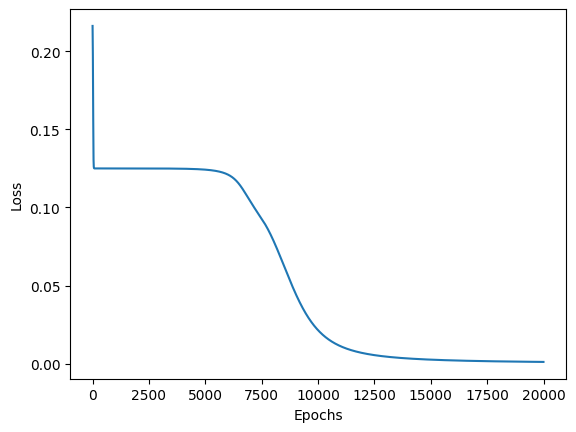

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


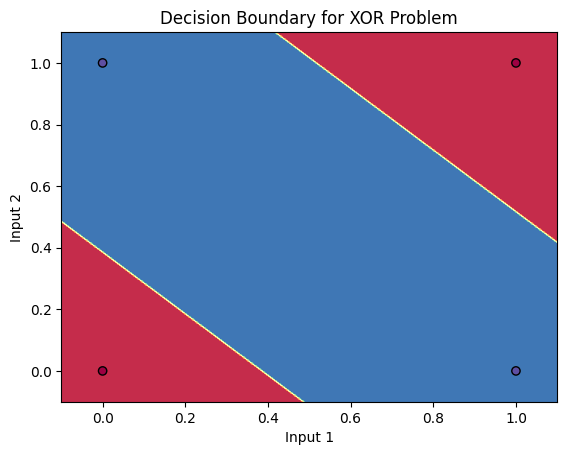

In [3]:
# The XOR Dataset
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

class TwoLayerMLP:
    def __init__(self, input_size, hidden_size, output_size, reg_lambda):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.reg_lambda = reg_lambda
        self.init_weights()

    def init_weights(self):
        self.W1 = np.random.randn(self.input_size, self.hidden_size) *0.01
        self.b1 = np.random.randn(self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size) *0.01
        self.b2 = np.random.randn(self.output_size)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        s = self.sigmoid(Z)
        return s * (1 - s)

    def forward(self, X, Y=None):
        self.X = X
        if Y is not None:
            self.Y = Y

        self.hidden_layer_input = np.dot(X, self.W1) + self.b1
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.W2) + self.b2
        self.predicted_output = self.sigmoid(self.output_layer_input)
        return self.predicted_output

    def compute_loss(self, Y_pred=None, Y=None):
        if Y_pred is None:
            Y_pred = self.predicted_output
        if Y is None:
            Y = self.Y

        batch_size = Y_pred.shape[0]
        
        loss = np.mean(np.square(Y - Y_pred)) / 2

        return loss

    def backward(self):
        Y_pred = self.predicted_output
        Y = self.Y
        X = self.X

        self.error = y - self.predicted_output
        self.d_predicted_output = self.error * (self.predicted_output * (1 - self.predicted_output))
        self.error_hidden_layer = self.d_predicted_output.dot(self.W2.T)
        self.d_hidden_layer = self.error_hidden_layer * (self.hidden_layer_output * (1 - self.hidden_layer_output))

    def update_weights(self, learning_rate):
        self.W2 += self.hidden_layer_output.T.dot(self.d_predicted_output) * learning_rate
        self.b2 += np.sum(self.d_predicted_output, axis=0) * learning_rate
        self.W1 += X.T.dot(self.d_hidden_layer) * learning_rate
        self.b1 += np.sum(self.d_hidden_layer, axis=0) * learning_rate

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        losses = []
        for epoch in range(epochs):
            self.forward(X, y)
            loss = self.compute_loss()
            #print('Epoch:', epoch, 'Loss:', loss)
            self.backward()
            self.update_weights(learning_rate)
            losses.append(loss)
        return losses

    def predict(self, X):
        self.forward(X)
        print(np.round(self.predicted_output))
        return np.round(self.predicted_output)

    def desicion_boundary(self, X):
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()]) 
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral, edgecolors='k')
        plt.title("Decision Boundary for XOR Problem")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.show()
    



model = TwoLayerMLP(input_size=2, hidden_size=5, output_size=1, reg_lambda=0.01)
losses = model.train(X, y, learning_rate=0.1, epochs=20000)

#These are true values of the XOR dataset
print('True values:')
print(y)

print('Predictions:')
model.predict(X)




#Losses are nearly zero after 1000 epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


# Plot decision boundary
model.desicion_boundary(X)
#I don't understand why


# Chance Prediction for graduate admission.

<Axes: >

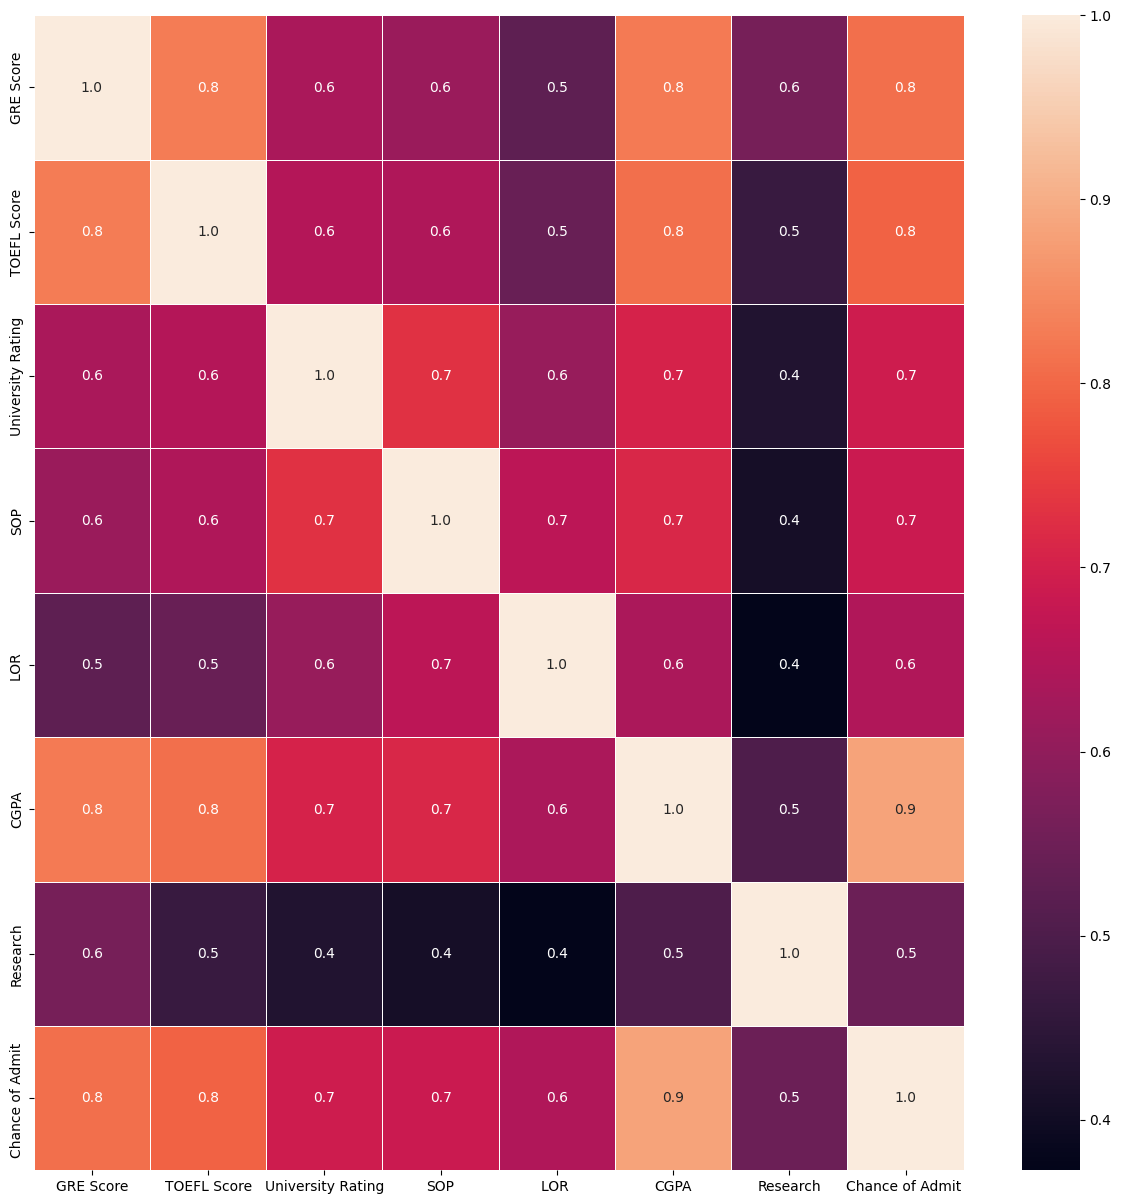

In [2]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

# Read the dataset
dataset = pd.read_csv('admissionv2.csv')

# Remove the useless "Serial No."
dataset.drop('Serial No.', axis=1, inplace=True)


# Let's look at the correlations across the columns.
dataset.corr() # Print the correlations


# We can see easier when we draw a correlation heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, linecolor="white", fmt= '.1f',ax=ax)
# Which score looks like the most related to the admission chance?





### We need the R^2 score to be as high as possible while RMSE will remain as low as possible.
### The output graph should be nearest to a linear function

R^2 score: 0.8327834693115617
RMSE: 0.05839605702814671


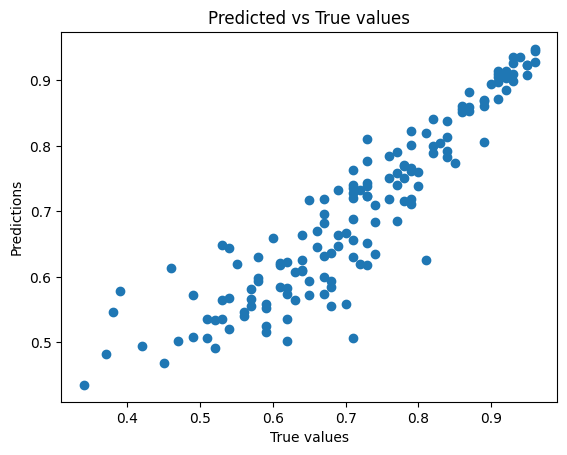

In [8]:
# Separate the targets from the inputs
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,7].values.reshape(-1,1) # Chance of admission
# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)
# Split the training and validation sets (ensuring the same split always)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.30,
shuffle=False, random_state=1)
# Preprocessing (by standard normalization since we observed quite different scales/centers)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # We fit the scaler only on the training set
x_valid = scaler.transform(x_valid) # We use the resulting fit on the validation set (always!)
#print(x_train.shape, x_valid.shape)

# Define the two-layer neural network model

# I got help from github colab to write the code better.

class TwoLayerNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, momentum=0.9, l2_reg=0.001 , batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.l2_reg = l2_reg
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))
        
        # Initialize velocities for momentum
        self.v_W1 = np.zeros_like(self.W1)
        self.v_b1 = np.zeros_like(self.b1)
        self.v_W2 = np.zeros_like(self.W2)
        self.v_b2 = np.zeros_like(self.b2)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def update_weights_with_momentum(self, dW1, dW2, db1, db2):
  # Update weights and biases with momentum
        self.v_W2 = self.momentum * self.v_W2 - self.learning_rate * dW2
        self.W2 += self.v_W2
        self.v_b2 = self.momentum * self.v_b2 - self.learning_rate * db2
        self.b2 += self.v_b2

        self.v_W1 = self.momentum * self.v_W1 - self.learning_rate * dW1
        self.W1 += self.v_W1
        self.v_b1 = self.momentum * self.v_b1 - self.learning_rate * db1
        self.b1 += self.v_b1

    def backward(self, X, y, output):
        # Backward pass
        error = output - y
        delta2 = error * self.sigmoid_derivative(output)
        dW2 = np.dot(self.a1.T, delta2) + self.l2_reg * self.W2
        db2 = np.sum(delta2, axis=0, keepdims=True)

        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, delta1) + self.l2_reg * self.W1
        db1 = np.sum(delta1, axis=0, keepdims=True)

        return dW1, dW2, db1, db2

    def train(self, X, y, epochs=1000, batch_size=32):
            num_samples = X.shape[0]
            num_batches = num_samples // batch_size
            
            for i in range(epochs):
                # Shuffle the data
                indices = np.random.permutation(num_samples)
                X_shuffled = X[indices]
                y_shuffled = y[indices]
                
                for j in range(num_batches):
                    # Get the mini-batch
                    start_idx = j * batch_size
                    end_idx = (j + 1) * batch_size
                    X_batch = X_shuffled[start_idx:end_idx]
                    y_batch = y_shuffled[start_idx:end_idx]
                    
                    # Forward propagation
                    output = self.forward(X_batch)
                    
                    # Backpropagation
                    dW1, dW2, db1, db2 = self.backward(X_batch, y_batch, output)
                    
                    self.update_weights_with_momentum(dW1, dW2, db1, db2)

    def predict(self, X):
        # Predict output for new data
        return self.forward(X)
    


model = TwoLayerNN(input_size=7, hidden_size=20, output_size=1, learning_rate=0.1, momentum=0.1, l2_reg=0.001)
model.train(x_train, y_train, epochs=100000)

# Predict the validation set
y_pred = model.predict(x_valid)

# Calculate the R^2 score
r2 = r2_score(y_valid, y_pred)
print('R^2 score:', r2)

# Calculate the RMSE
rmse = root_mean_squared_error(y_valid, y_pred)
print('RMSE:', rmse)

# Plot the predicted vs true values
plt.scatter(y_valid, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('Predicted vs True values')
plt.show()



## We need this plot to be as linear as possible.

# Explanation of the performance metrics.

## R-squared (R²)

Formula: R² = 1 - Σ(y_i - ŷ_i)² / Σ(y_i - ȳ)²

* y_i: Actual value
* ŷ_i: Predicted value by the model
* ȳ: Mean of the actual values

* R² is a statistical measure that represents the proportion of variance (spread) in the dependent variable (what you're trying to predict) that can be explained by the independent variables (what you're using for prediction) in your model. It essentially tells you how well your model fits the data. (Wikipedia)

Range: 0 ≤ R² ≤ 1

* 0: No explanatory power (terrible prediction)
* 1: Perfect fit (all the variance is explained by the model)

## Root Mean Squared Error (RMSE)

![Image](ss1.png)

* RMSE reflects the average magnitude of the error between predicted values (ŷ_i) and actual values (y_i). It's calculated by taking the square root of the mean squared error (MSE).

Range: 0 ≤ RMSE ≤ ∞ (unbounded)

* 0: Perfect prediction (no errors)
* Higher values: Larger errors (worse prediction)




In [7]:
# Define the parameter grid
param_grid = {
    'hidden_size': [5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1],
    'momentum': [0.01, 0.1, 0.5],
    'l2_reg': [0.001, 0.01, 0.1]
}

# Create an instance of the model
model = TwoLayerNN(input_size=7, hidden_size=5, output_size=1, learning_rate=0.001, momentum=0.03, l2_reg=0.001)

# Make the grid search with the param_grid using for loops without using GridSearchCV
best_score = 0
best_params = {}
for hidden_size in param_grid['hidden_size']:
    for learning_rate in param_grid['learning_rate']:
        for momentum in param_grid['momentum']:
            for l2_reg in param_grid['l2_reg']:
                model = TwoLayerNN(input_size=7, hidden_size=hidden_size, output_size=1, learning_rate=learning_rate, momentum=momentum, l2_reg=l2_reg)
                model.train(x_train, y_train, epochs=1000)
                y_pred = model.predict(x_valid)
                r2 = r2_score(y_valid, y_pred)
                if r2 > best_score:
                    best_score = r2
                    best_params = {'hidden_size': hidden_size, 'learning_rate': learning_rate, 'momentum': momentum, 'l2_reg': l2_reg}


# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'hidden_size': 15, 'learning_rate': 0.1, 'momentum': 0.1, 'l2_reg': 0.001}
Best Score: 0.8495691579527487
